# Author - Yamini Chauhan

# Task - 3 Exploratory Data Analysis - Retail

## First we export the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline    
#inline is used so that plot graphics will appear in your notebook
import warnings 
warnings.filterwarnings(action= 'ignore')

## Import the DATASET - SAMPLESUPERSTORE

In [3]:
df=pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.shape

(9994, 13)

## There are total 9994 rows and 13 columns which includes the information about category, sales, discount, profit,  region, country etc
## Now, we will explore the dataset to know about it.

In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## Now, we will find out the null values and duplicates values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
df.duplicated().sum()

17

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [12]:
df.drop(['Postal Code'], axis=1,inplace=True)

In [13]:
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


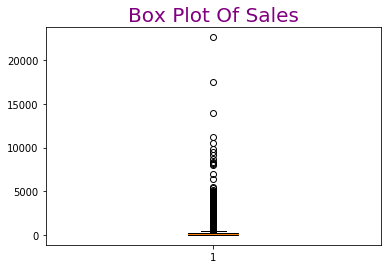

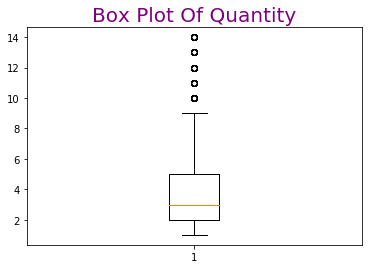

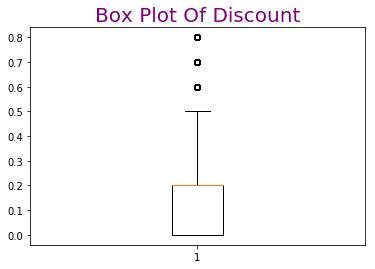

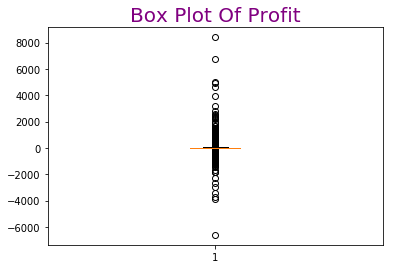

In [14]:
#Checking ouliers in Sales, Quantity, Discount and Profit columns.
columns = ['Sales', 'Quantity', 'Discount', 'Profit']
for x in columns:
    plt.figure()                                               
    plt.boxplot(df[x])
    plt.title(f"Box Plot Of {x}" , fontsize=20, color="Purple")
plt.show()

## As we can see that there are a lot outliers in above mentioned columns. So removing outliers will effect our dataset. So we are not treating the outliers in this case.

## Visualization

We try to visualise each column so that we can extract relevant information from each output.

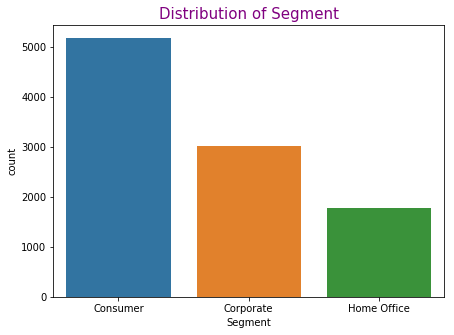

In [15]:
plt.figure(figsize=(7,5))
sns.countplot(x=df['Segment'])
plt.title('Distribution of Segment',fontsize=15, color="Purple")
plt.show()

## This histogram shows that the Consumer segment contributes the highest percentage to the business.

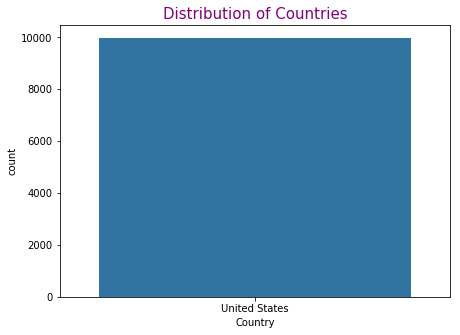

In [16]:
plt.figure(figsize=(7,5))
sns.countplot(x=df['Country'])
plt.title('Distribution of Countries',fontsize=15, color="Purple")
plt.show()

## As there is only one country. We can drop the country column.

In [17]:
df.drop(columns='Country',inplace=True, axis=1)

In [18]:
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [19]:
df.columns=['Ship_Mode','Segment','City','State','Region','Category','Sub-Category','Sales','Quantity','Discount','Profit']
df.head()

,Ship_Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


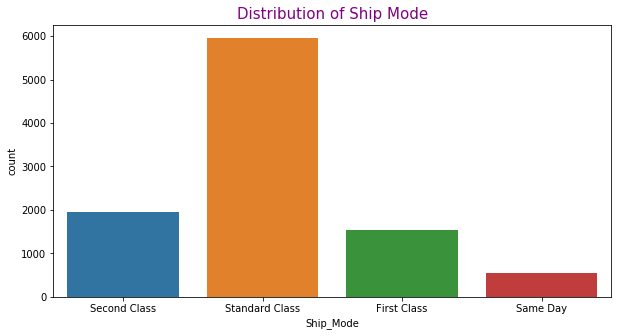

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Ship_Mode'])
plt.title('Distribution of Ship Mode',fontsize=15, color="Purple")
plt.show()

The ship mode 'Standard Class' is the most common mode of shipment over others classes.

Text(0,0.5,'Count')

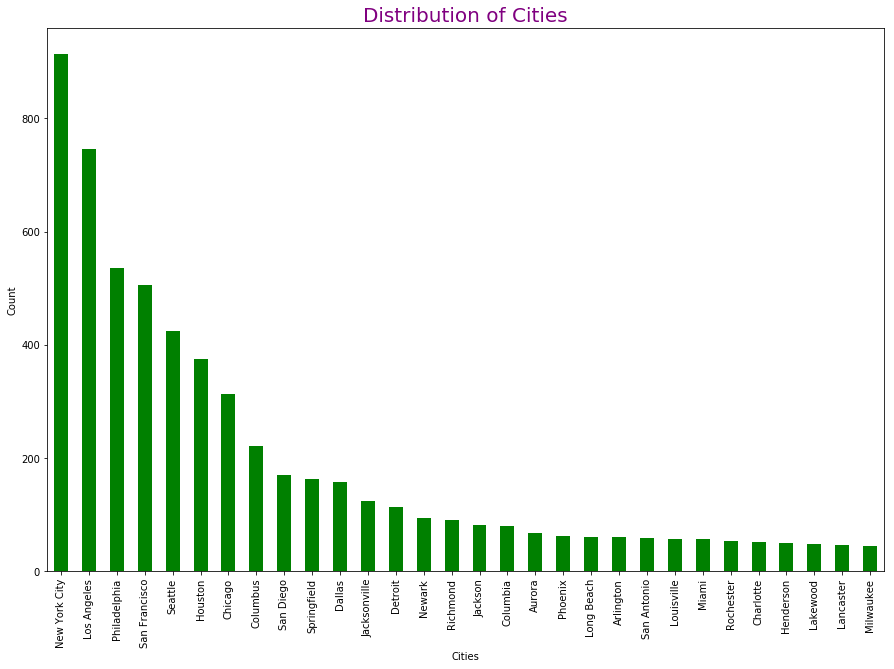

In [21]:
df.City.value_counts().nlargest(30).plot(kind = 'bar', figsize = (15,10), color = ['green'])
plt.title('Distribution of Cities',fontsize=20,color='Purple')
plt.xlabel('Cities')
plt.ylabel('Count')

Text(0,0.5,'Count')

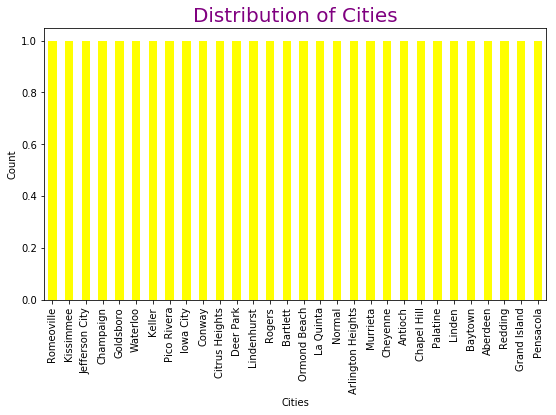

In [22]:
df.City.value_counts().nsmallest(30).plot(kind = 'bar', figsize = (9,5), color = ['yellow'])
plt.title('Distribution of Cities',fontsize=20,color='Purple')
plt.xlabel('Cities')
plt.ylabel('Count')

 As we can see that the most customers are from new york city and least 30 countries where there is very less customers are mentioned above.

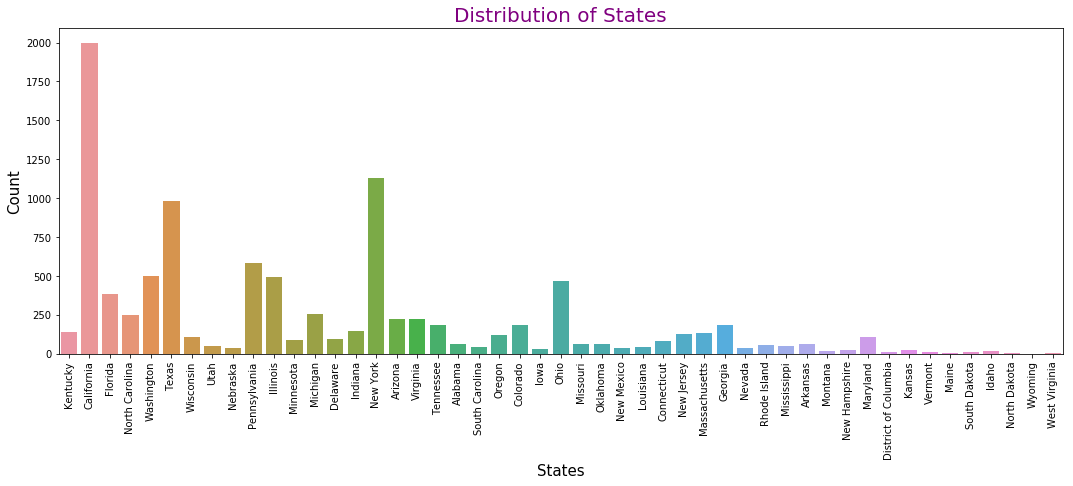

In [23]:
plt.figure(figsize = (18,6))
sns.countplot(x = df['State']) #counts the number of observations per category for a categorical variable
plt.xticks(rotation = 90) #used to rotate the labels on the mentioned axis 
plt.xlabel("States", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title('Distribution of States', fontsize = 20,color='purple')
plt.show()

Text(0.5,1,'Distribution of Regions')

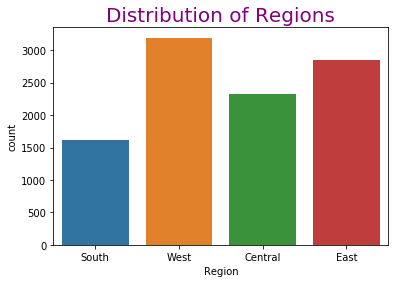

In [24]:
sns.countplot(x=df['Region'])
plt.title("Distribution of Regions", fontsize=20,color='purple')


From above three visualizations, we have to focus on least countries where customers are less, states which is lesser count and in the south region so that we can increase the sales.

Text(0.5,1,'Distribution of Category')

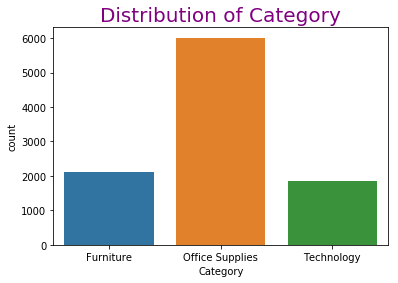

In [25]:
sns.countplot(x=df['Category'])
plt.title("Distribution of Category", fontsize=20,color='purple')


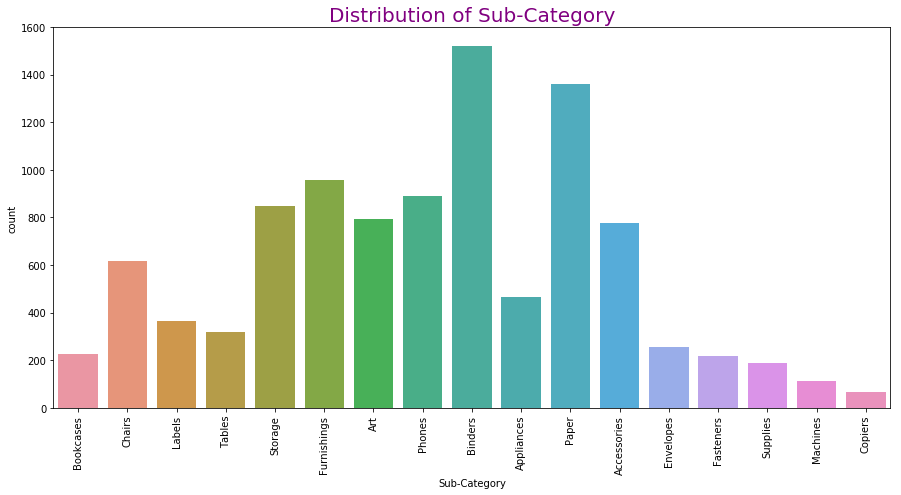

In [26]:
plt.figure(figsize = (15,7))
sns.countplot(x = df['Sub-Category'])
plt.xticks(rotation=90)
plt.title("Distribution of Sub-Category", fontsize=20,color='purple')
plt.show()

Text(0.5,1,'Distribution of Sales')

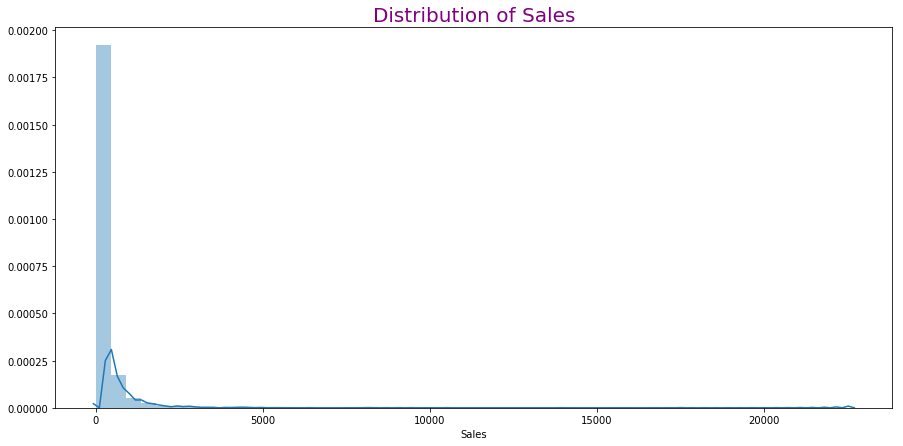

In [27]:
plt.figure(figsize = (15,7))
sns.distplot(df.Sales)
plt.title("Distribution of Sales",fontsize=20,color='purple')

Text(0.5,1,'Distribution of Quantity')

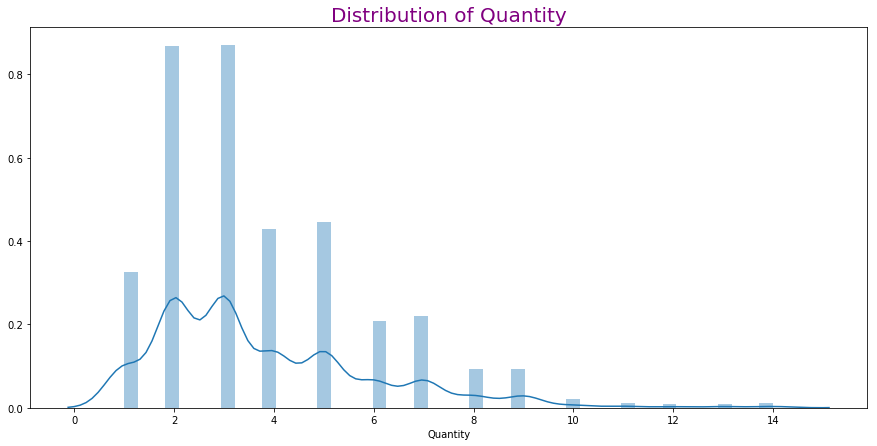

In [28]:
plt.figure(figsize = (15,7))
sns.distplot(df.Quantity)
plt.title("Distribution of Quantity",fontsize=20,color='purple')

Text(0.5,1,'Distribution of Discount')

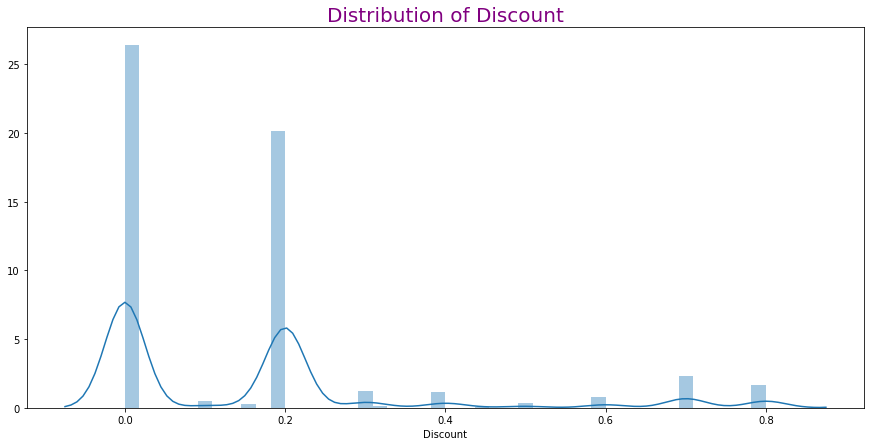

In [29]:
plt.figure(figsize = (15,7))
sns.distplot(df.Discount)
plt.title("Distribution of Discount",fontsize=20,color='purple')

Text(0.5,1,'Distribution of Profit')

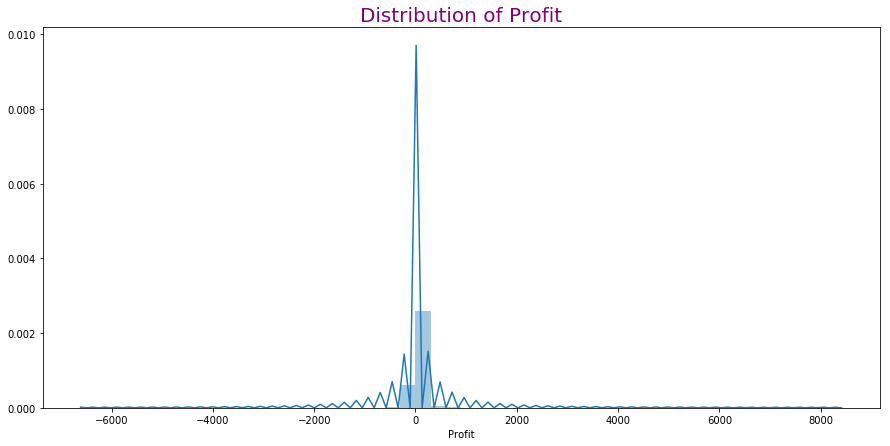

In [30]:
plt.figure(figsize = (15,7))
sns.distplot(df.Profit)
plt.title("Distribution of Profit",fontsize=20,color='purple')

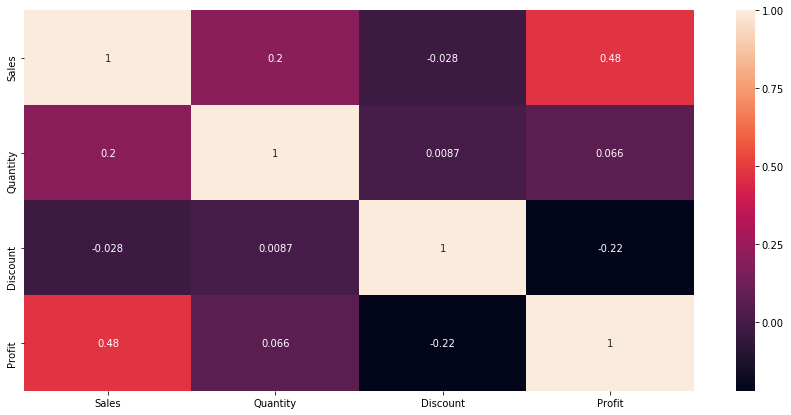

In [31]:
# Correlation between the entities 
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot= True)
plt.show()     

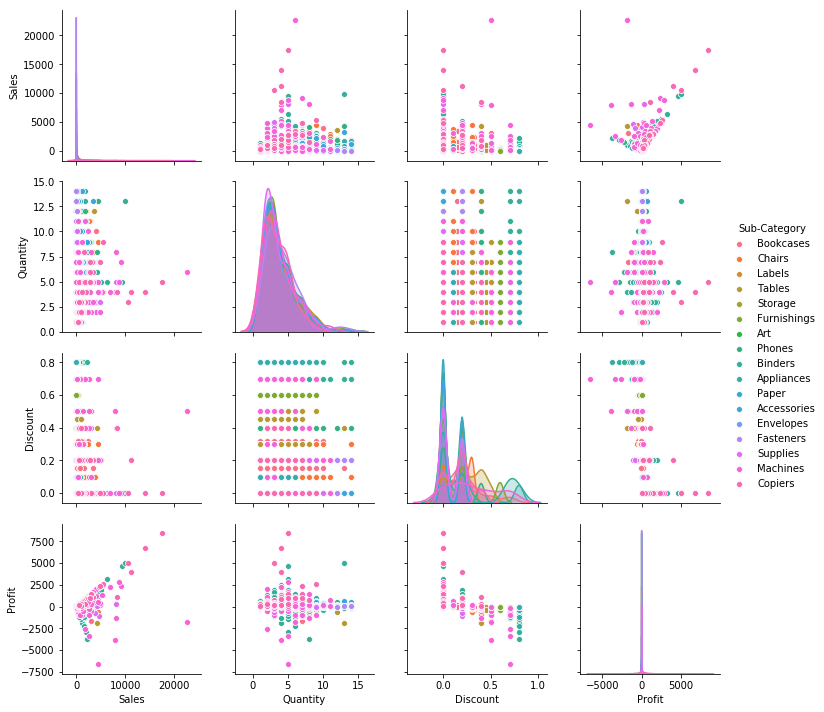

In [32]:
figsize=(20,5)
sns.pairplot(df,hue='Sub-Category')

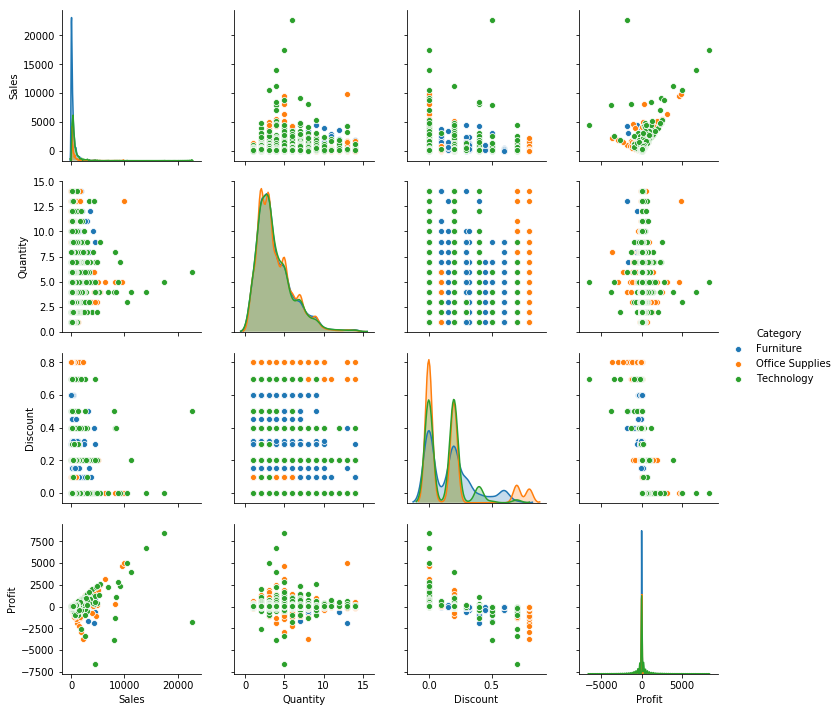

In [33]:
figsize=(20,5)
sns.pairplot(df,hue='Category')

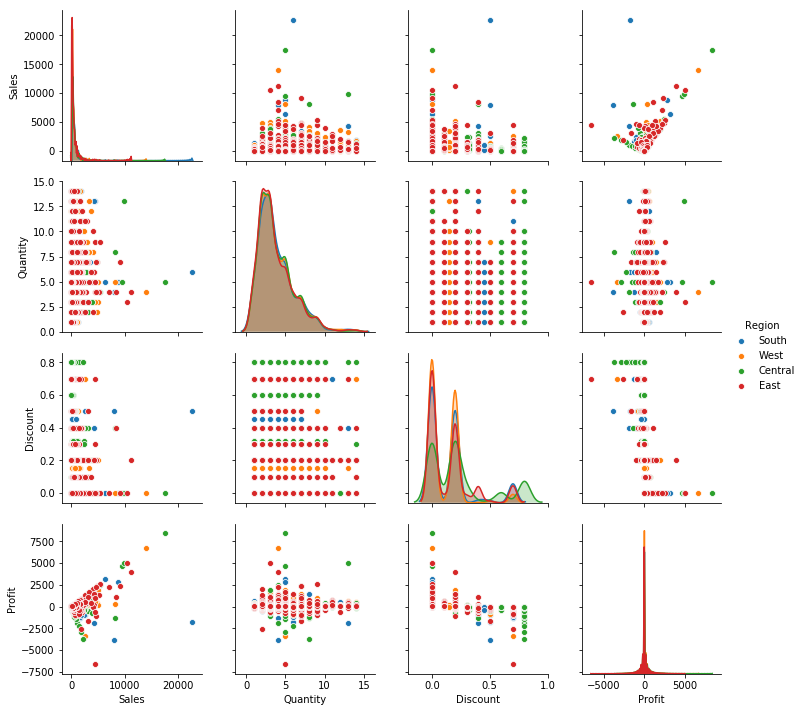

In [34]:
figsize=(20,5)
sns.pairplot(df, hue="Region") 

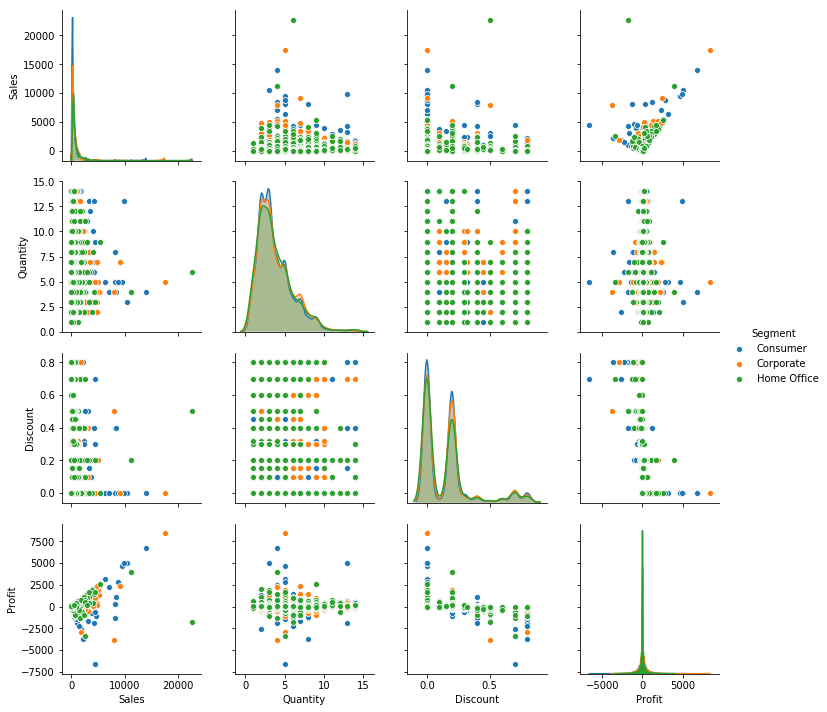

In [35]:
figsize=(20,5)
sns.pairplot(df,hue='Segment')   

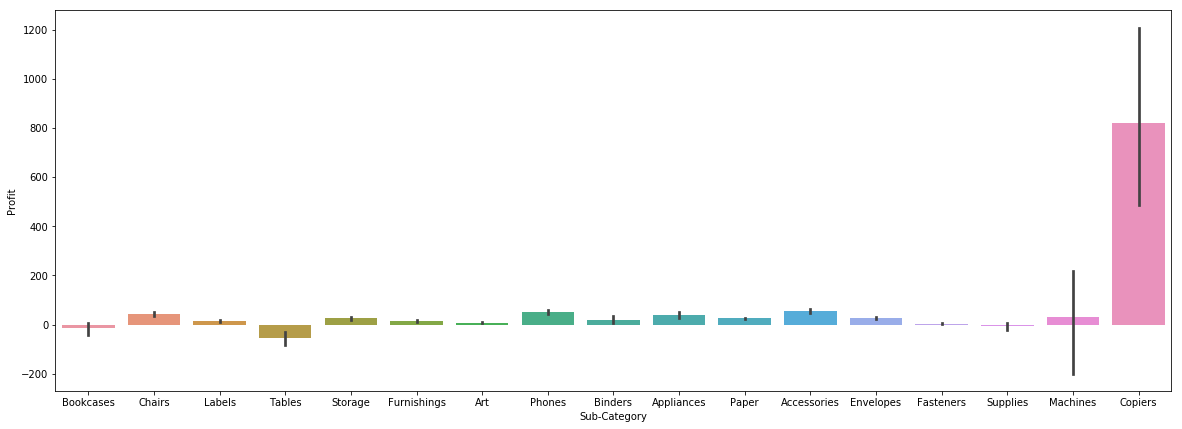

In [36]:
# Sub-Category wise profit
plt.figure(figsize=(20,7))
sns.barplot(x=df['Sub-Category'], y=df['Profit'])

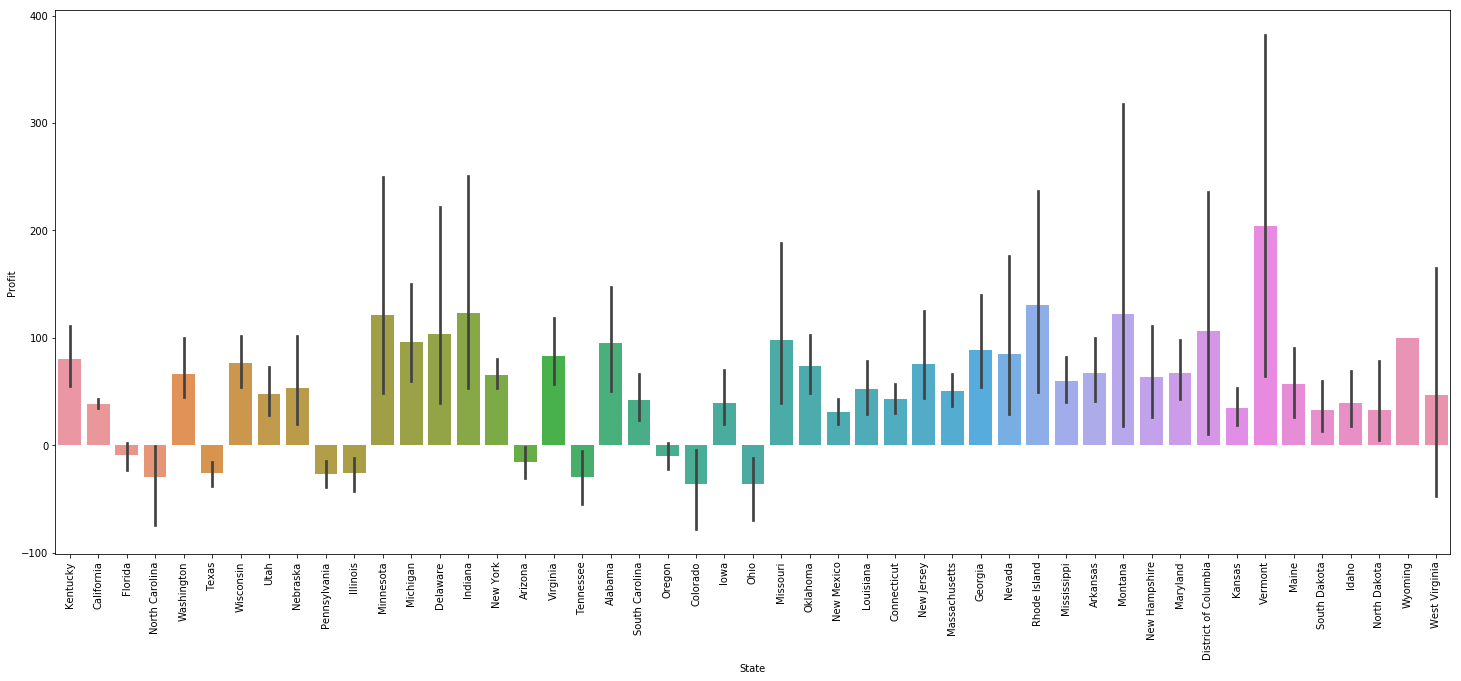

In [37]:
# State wise Profit
plt.figure(figsize=(25,10))
sns.barplot(x=df['State'], y=df['Profit'])
plt.xticks(rotation=90)
plt.show()

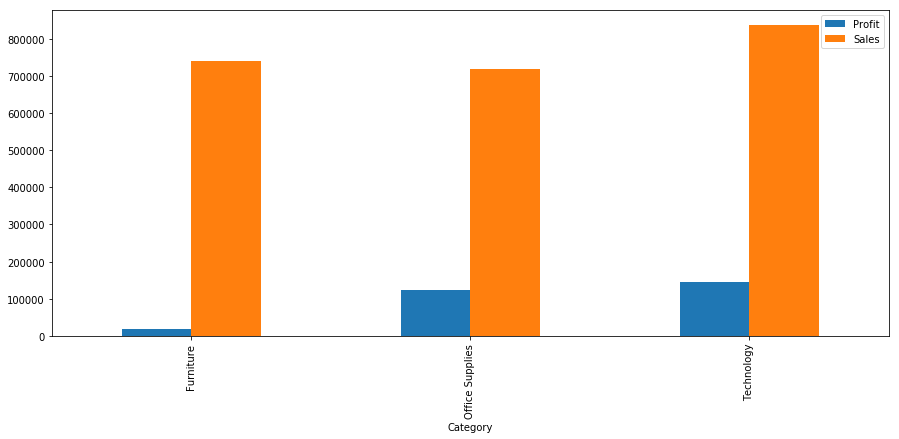

In [38]:
# Category wise projit and sales
category = df.groupby("Category")["Profit", "Sales"].sum()
category.plot.bar(figsize=(15,6))

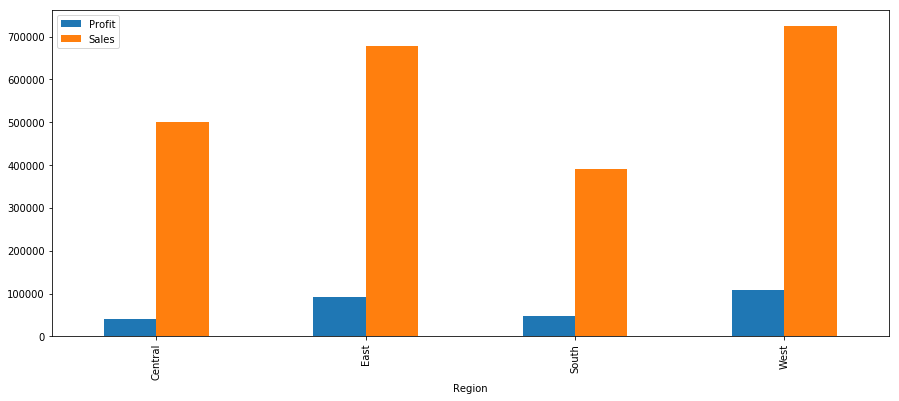

In [39]:
# Region wise projit and sales
category = df.groupby("Region")["Profit", "Sales"].sum()
category.plot.bar(figsize=(15,6))

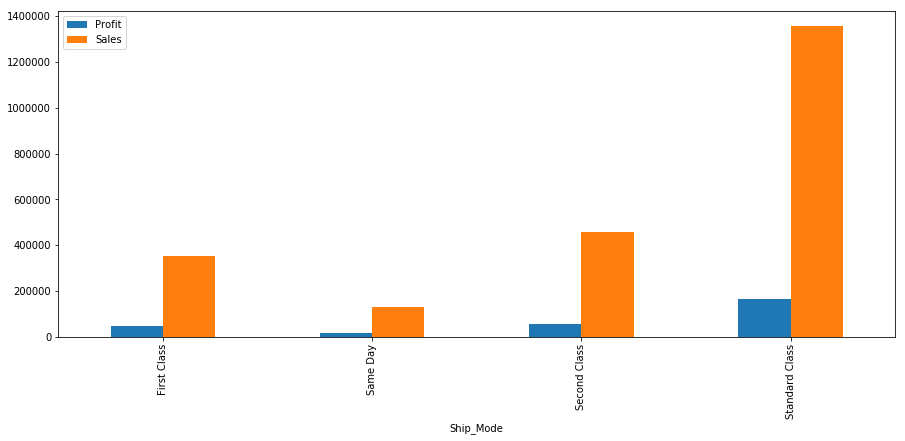

In [42]:
# Ship mode wise profit and sales
category = df.groupby("Ship_Mode")["Profit", "Sales"].sum()
category.plot.bar(figsize=(15,6))

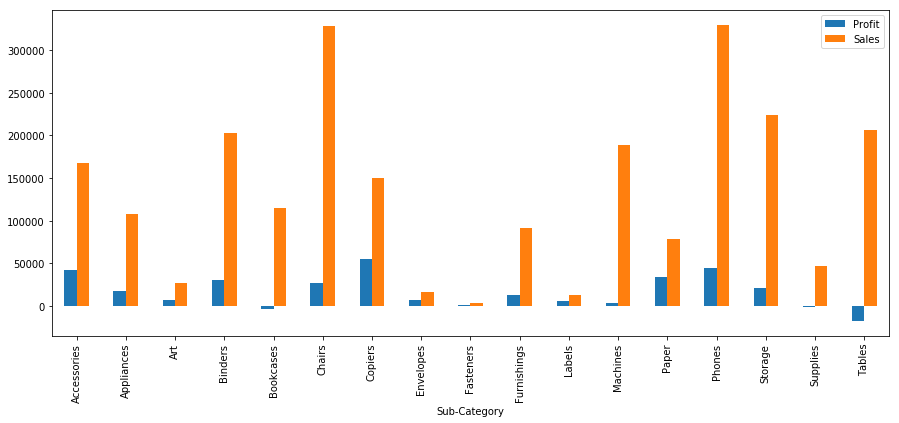

In [45]:
# Sub Category wise profit and sales
category = df.groupby("Sub-Category")["Profit", "Sales"].sum()
category.plot.bar(figsize=(15,6))

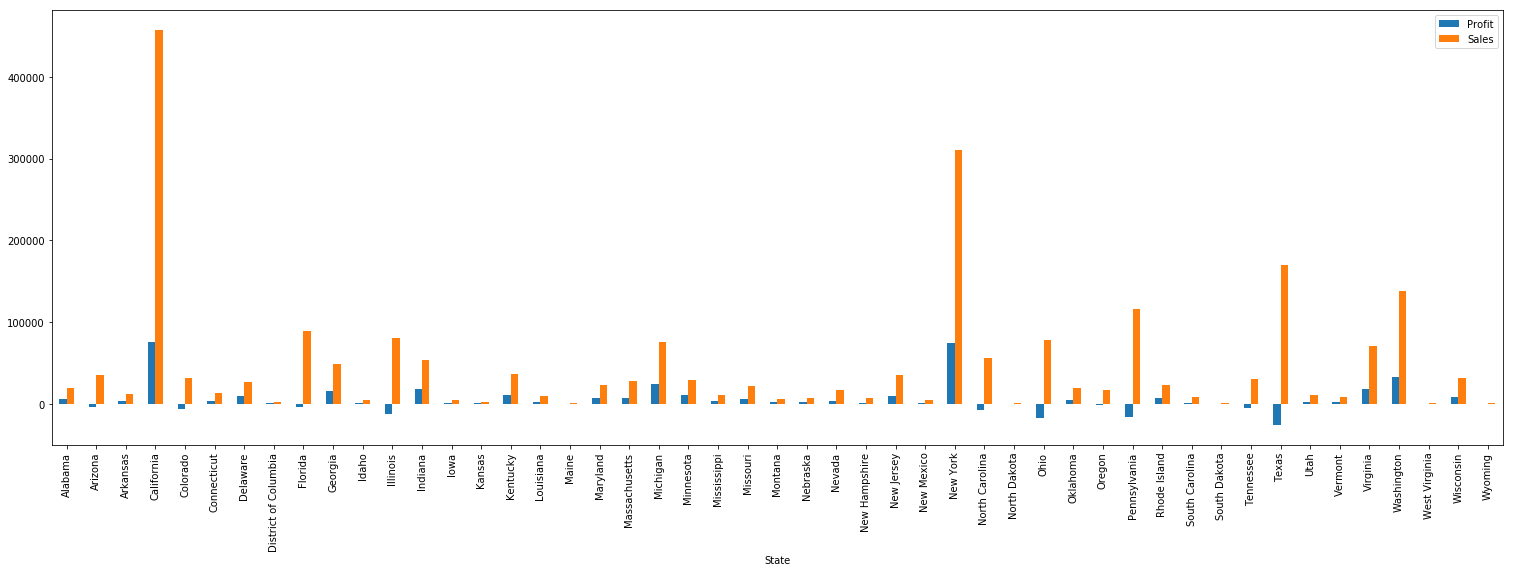

In [48]:
# State wise profit and sales
category = df.groupby("State")["Profit", "Sales"].sum()
category.plot.bar(figsize=(26,8))

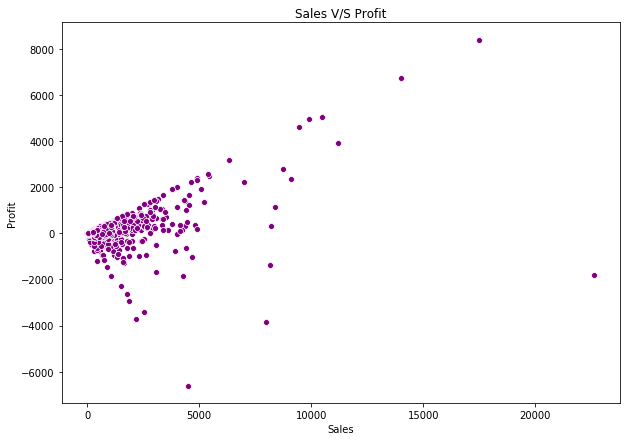

In [55]:
#Sales V/S Profits

plt.figure(figsize = (10,7))
plt.xticks(rotation = 0)
plt.title("Sales V/S Profit")

sns.scatterplot(x="Sales", y="Profit", data = df, color = 'purple')

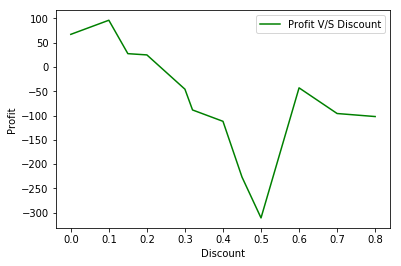

In [62]:
#Profit and Discount

sns.lineplot(x = 'Discount', y = 'Profit', data = df, label = 'Profit V/S Discount', ci = None,color='green')
plt.show()

Analysis:
1. Need to focus more on south and central regions.
2. Categories: Furniture and Technology needs to focused.
3. 
3. From Sales V/S Profits graph, the company surfaces losses when sales is less than 5000. The regions and products responsible for this loss need to targeted in order to minimise or eliminate this loss.
4. From Profit V/s Discount graph, there is profit when discount applied on purchases is upto 20% and as the discount increases, losses also increases for the company. In order to prevent losses, the company should give maximum 20% discount. 